# Installation

```pip install https://github.com/khramts/assocplots/archive/master.zip```

This tutorial provides examples of code for static Manhattan and QQ pltos. In order to view the figures in this notebook it is necessary to included the following line: 

In [29]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

## Importing data

For this tutorial, we are using anthropometric data from the GIANT consortium:
https://www.broadinstitute.org/collaboration/giant/index.php/GIANT_consortium_data_files

Result are described in Randall JC, Winkler TW, Kutalik Z, Berndt SI, Jackson AU, Monda KL, et al. (2013) Sex-stratified Genome-wide Association Studies Including 270,000 Individuals Show Sexual Dimorphism in Genetic Loci for Anthropometric Traits. PLoS Genet 9(6): e1003500. doi:10.1371/journal.pgen.1003500
http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1003500

In [2]:
import numpy as np
hip_m=np.genfromtxt('HIP_MEN_chr_pos_rs_pval.txt', dtype=None)
hip_w=np.genfromtxt('HIP_WOMEN_chr_pos_rs_pval.txt', dtype=None)

# Manhattan plots

Import the module for Manhattan plots

In [3]:
from assocplots.manhattan import *

## Classic Manhattan plot

In [17]:
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

0

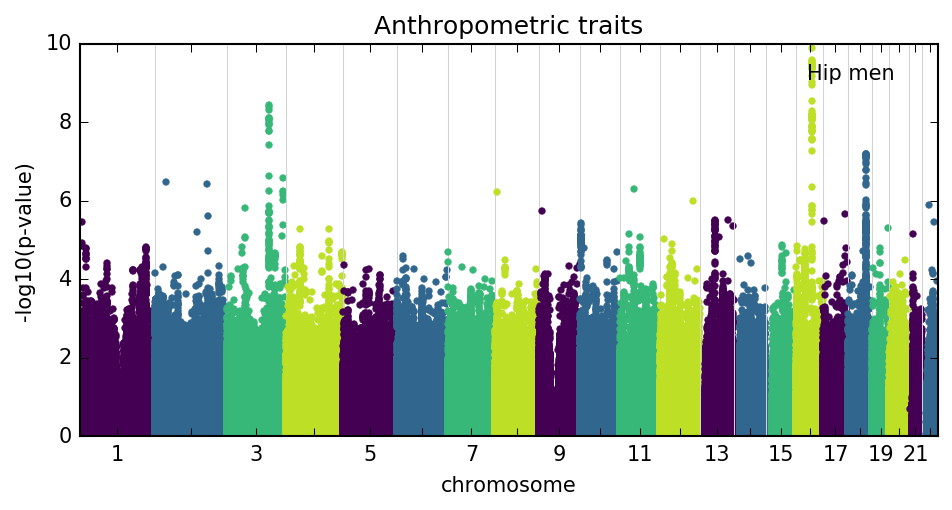

In [18]:
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors)

## Recoloring the plot

In [22]:
# To recolor the plot, select a different color map: http://matplotlib.org/examples/color/colormaps_reference.html 
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

0

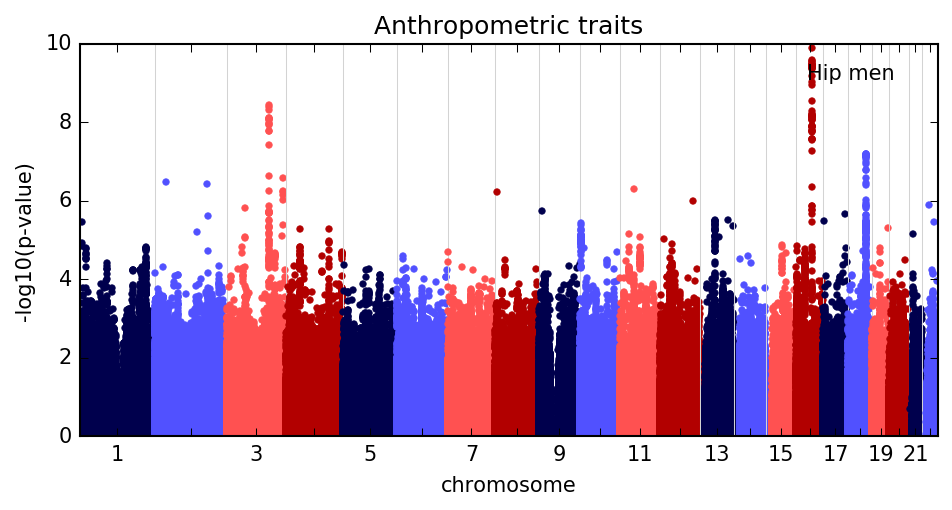

In [15]:
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors)

## Adding genome-wide significant line, and suggestive lines 

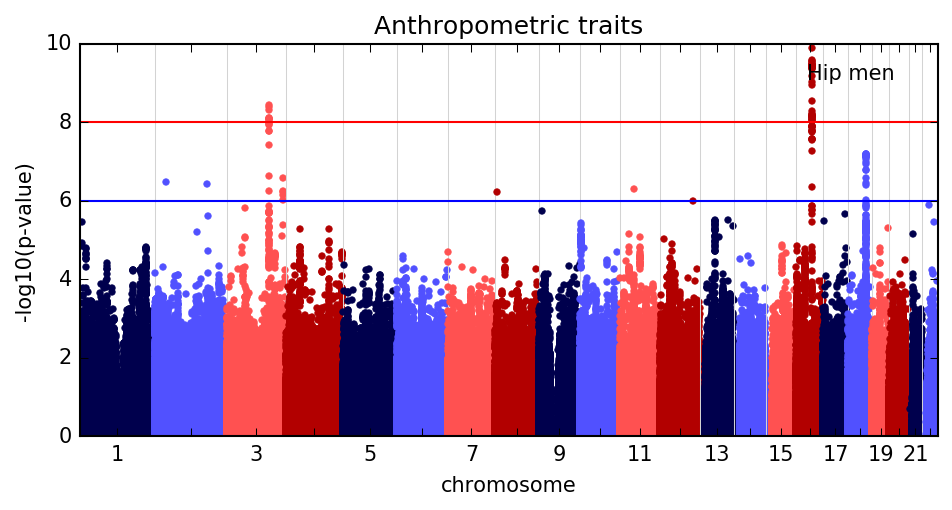

In [30]:
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [6, 8],
               lines_colors=['b', 'r'],
               colors = colors)
plt.savefig('Manhattan_HipMen.png', dpi=300)

## Plotting two groups in the same figure (double plot)

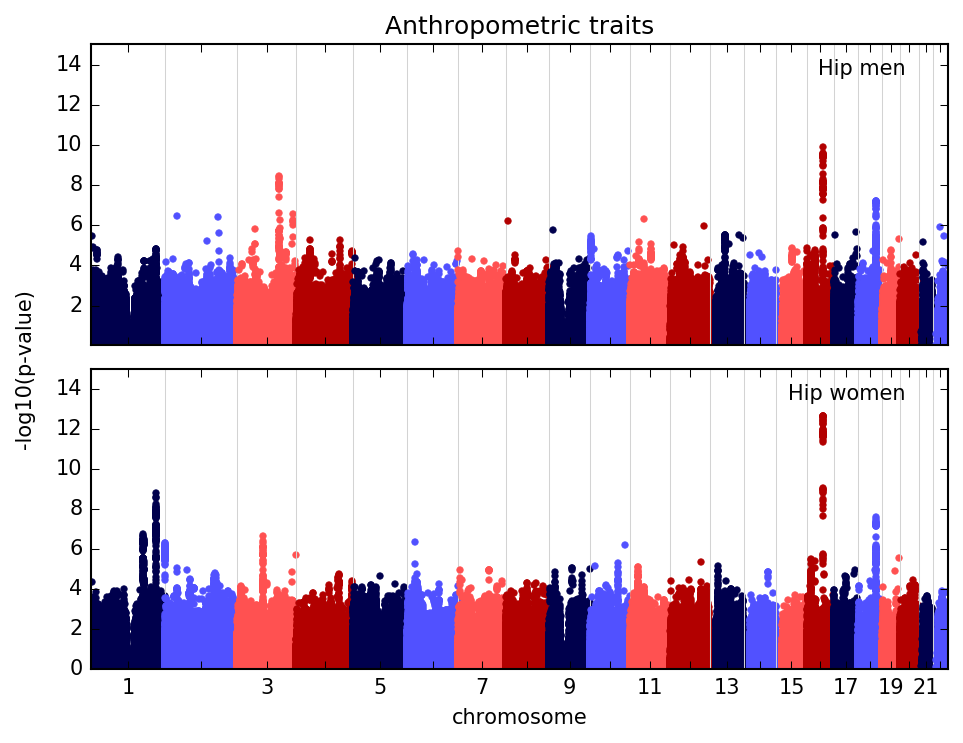

In [23]:
mpl.rcParams['figure.figsize']=7.375, 5.375

manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               p2=hip_w['f3'], pos2=hip_w['f1'], chr2=hip_w['f0'], label2='Hip women',
               type='double',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               top1 = 15,
               top2 = 15,
               colors = colors)
plt.subplots_adjust(hspace=0.08)

## Plotting two groups in the same figure (inverted plot)

0

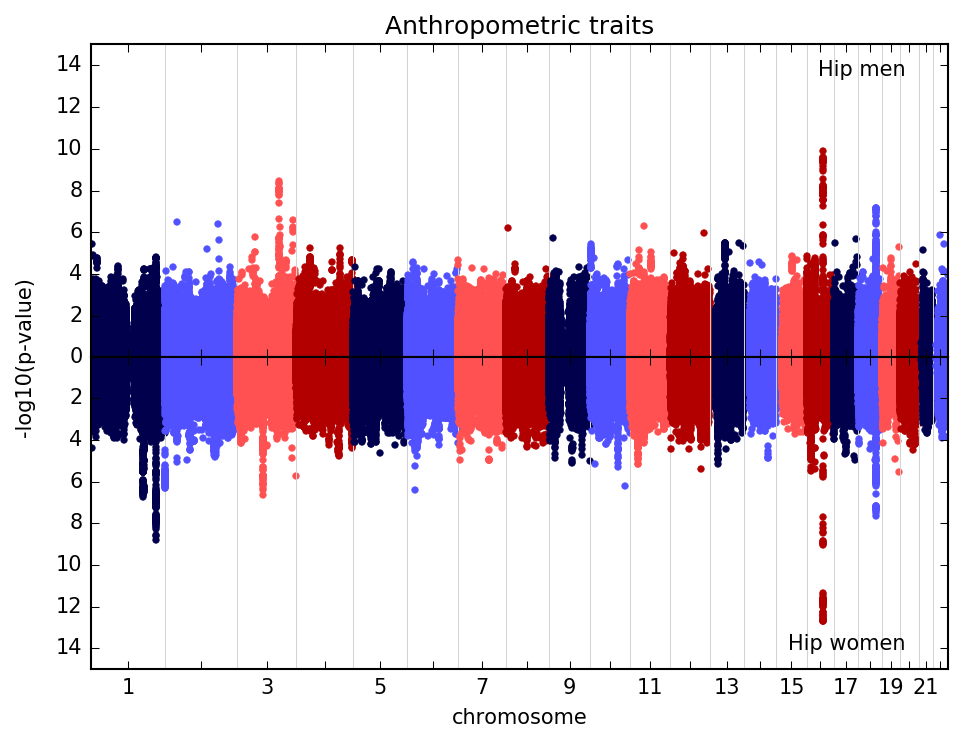

In [24]:
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               p2=hip_w['f3'], pos2=hip_w['f1'], chr2=hip_w['f0'], label2='Hip women',
               type='inverted',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               top1 = 15,
               top2 = 15,
               colors = colors)

# QQ plots

First, let's impot the module for QQ plots:

In [25]:
from assocplots.qqplot import *

C:\Users\Ekaterina\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1843: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\Users\Ekaterina\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc
assocplots\qqplot.py:53: RuntimeWarning: invalid value encountered in less
  q_err[i, q_err[i, :] < 0] = 1e-12
assocplots\qqplot.py:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
assocplots\qqplot.py:72: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


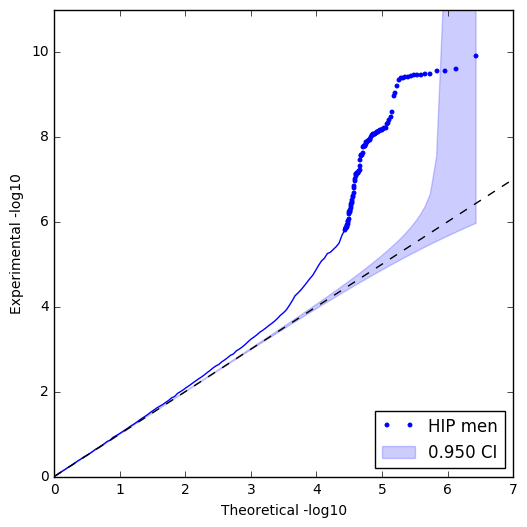

In [26]:
# This is an example of a classic QQ plot with 95% confidence interval plotted for the null distribution

mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_m['f3']], 
       ['HIP men'], 
       color=['b'], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='normal',
       title='')


plt.savefig('qq_HIPmen_theoretical_error.png', dpi=300)

In [27]:
# Now we want to calculate the genomic control (inflation factor, lambda)
get_lambda(hip_m['f3'], definition = 'median')

1.0

assocplots\qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)
assocplots\qqplot.py:69: RuntimeWarning: divide by zero encountered in divide
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


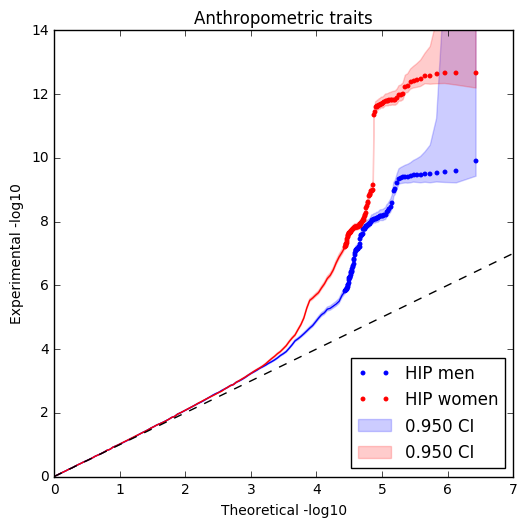

In [28]:
# This is a qq plot showing two experimental groups
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_m['f3'], hip_w['f3']], 
       ['HIP men', 'HIP women'], 
       color=['b','r'], 
       fill_dens=[0.2,0.2], 
       error_type='experimental', 
       distribution='normal',
       title='Anthropometric traits')

#plt.savefig('qq_six_groups.png', dpi=300)

# To-do list

1. Labeling top points

In [ ]:
# To label the dots need to add annotate

mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'], 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 3,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors)

for i, txt in enumerate(hip_m['f2']):
    ax.annotate(txt, (hip_m['f1'][i],-np.log10(hip_m['f3'])))